In [1]:
# Imports
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt

In [2]:
# Load the Data
data_path = "data/"
data = pd.read_csv(os.path.join(data_path, "dataset.csv"))

data.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2024,202401,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2024,202402,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2024,202403,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2024,202404,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2024,202405,NaN,NaN,NaN,NaN,NaN


In [3]:
# inspect datatypes
data.dtypes

MONATSZAHL                         object
AUSPRAEGUNG                        object
JAHR                                int64
MONAT                              object
WERT                              float64
VORJAHRESWERT                     float64
VERAEND_VORMONAT_PROZENT          float64
VERAEND_VORJAHRESMONAT_PROZENT    float64
ZWOELF_MONATE_MITTELWERT          float64
dtype: object

In [4]:
# drop all values after 2020
data = data[data.apply(lambda row: row['JAHR'] <= 2020, axis=1)]

data.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
50,Alkoholunfälle,insgesamt,2020,Summe,430.0,434.0,NaN,-0.92,NaN
51,Alkoholunfälle,insgesamt,2020,202001,28.0,22.0,-20.00,27.27,37.0
52,Alkoholunfälle,insgesamt,2020,202002,40.0,28.0,42.86,42.86,38.0
53,Alkoholunfälle,insgesamt,2020,202003,27.0,34.0,-32.50,-20.59,37.0
54,Alkoholunfälle,insgesamt,2020,202004,26.0,36.0,-3.70,-27.78,36.0


In [5]:
# explore the data
data = data.iloc[:, :5] # only the first five columns are important per assignment requirements
data.nunique()

MONATSZAHL       3
AUSPRAEGUNG      3
JAHR            21
MONAT          253
WERT           924
dtype: int64

Since Month is an object type - it would be best to convert it to int in the range 1-12. Additionally, we drop the "Summe" rows since they do not fit the requirements
for this task. Additionally, we would need one-hot encoding for our prediction model.

In [6]:
#Drop the Summe rows
data = data[data.apply(lambda row: row['MONAT'] != 'Summe', axis=1)]
# format the month entries
data['MONAT'] = data['MONAT'].astype(str).str[-2:].astype(int)
data.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
51,Alkoholunfälle,insgesamt,2020,1,28.0
52,Alkoholunfälle,insgesamt,2020,2,40.0
53,Alkoholunfälle,insgesamt,2020,3,27.0
54,Alkoholunfälle,insgesamt,2020,4,26.0
55,Alkoholunfälle,insgesamt,2020,5,40.0


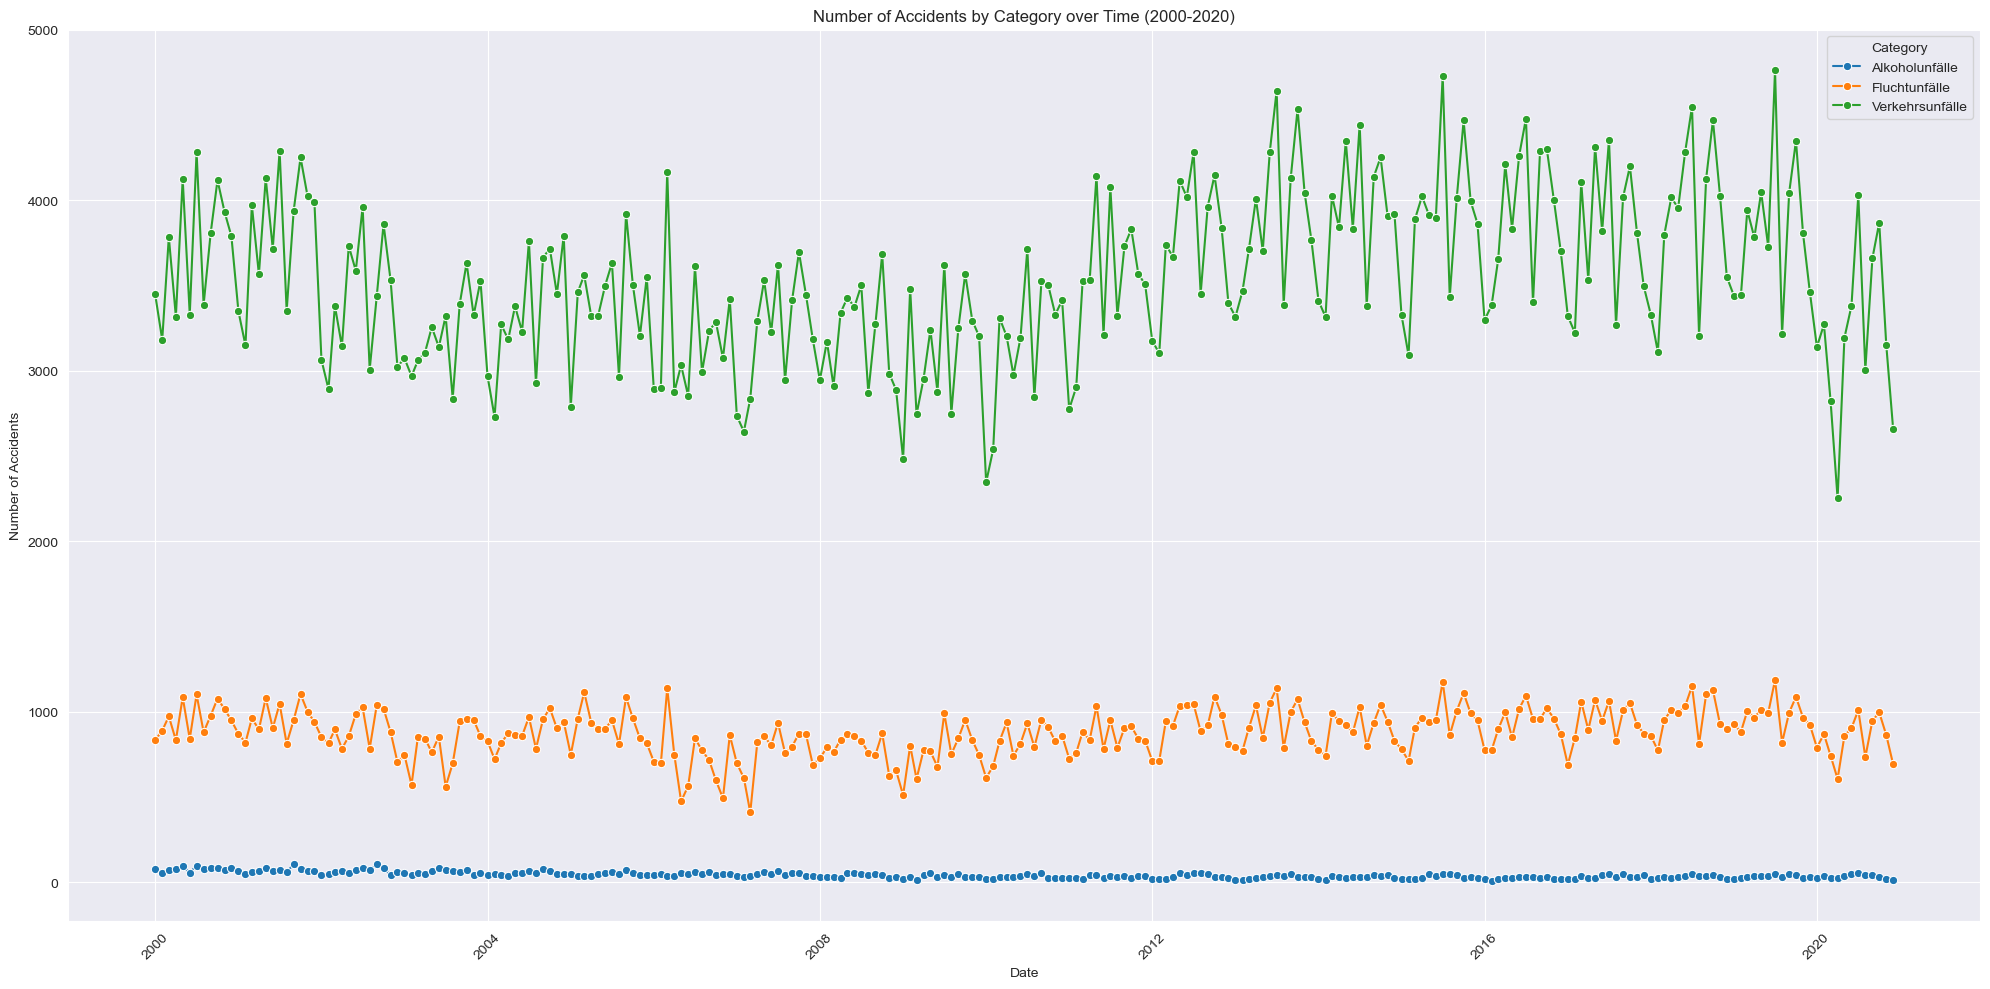

In [8]:
# create a copy for easier data manipulation
data_plot = data.copy()

# sort the relevant subcategory
data_plot = data_plot[data_plot['AUSPRAEGUNG'] == 'insgesamt']

data_plot['DATUM'] = pd.to_datetime(data_plot['JAHR'].astype(str) + '-' + data_plot['MONAT'].astype(str).str.zfill(2) + '-01') # add date for plotting

data_plot = data_plot.sort_values('DATUM') # Sort the dataframe by date

# Create the plot
plt.figure(figsize=(20, 10))
sns.lineplot(data=data_plot, x='DATUM', y='WERT', hue='MONATSZAHL', marker='o')

# Add title and labels
plt.title('Number of Accidents by Category over Time (2000-2020)')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Category')

# Visualize
plt.tight_layout()
plt.show()